# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import string
from nltk.corpus import stopwords

from sklearn.model_selection         import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,  TfidfTransformer
from sklearn.naive_bayes             import MultinomialNB
from sklearn.metrics                 import confusion_matrix, classification_report

import statsmodels.api as sm

# 2. Load data

In [2]:
data = pd.read_csv('spamsms.csv', encoding='latin-1')

# 3. Exploring and preparing the data 

In [3]:
data.head(3)

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
data = data[ ['type','text'] ]
data.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [5]:
# counting sub_cats of 'type'
pd.crosstab(data['type'],columns='sub_count')   #data['type'].value_counts()

col_0,sub_count
type,
ham,4825
spam,747


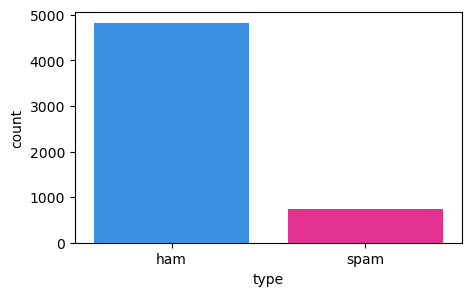

In [6]:
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot( data=data, x='type', ax=ax, palette=['dodgerblue','deeppink'] )
plt.show()

# 4. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


In [7]:
#Data preparation – splitting text documents into words

def text_process (x):
    return x.split()

bow_transformer  =  CountVectorizer( analyzer=text_process )
bow_transformer.fit( data['text'] )

print( len(bow_transformer.vocabulary_) )

15585


In [8]:
print(bow_transformer.get_feature_names_out()[0])
print(bow_transformer.get_feature_names_out()[8555])
print(bow_transformer.get_feature_names_out()[150])

!
february
*phews*


In [9]:
# Data preparation – creating indicator features for frequent words

messages_bow      = bow_transformer.transform( data )
 
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit( messages_bow )

messages_tfidf    = tfidf_transformer.transform( messages_bow )

print( messages_tfidf.shape )

(2, 15585)


# 5. Create training and test datasets

In [10]:
data['length'] = data['text'].apply(lambda x: len(x))
data = data[data['length']>0]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
 2   length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [11]:
data.sample(5)

,type,text,length
2073,spam,FreeMsg: Claim ur 250 SMS messages-Text OK to ...,161
1445,ham,I am in a marriage function,27
529,ham,Jay says that you're a double-faggot,36
1725,ham,You know there is. I shall speak to you in &l...,67
5488,ham,K. I will sent it again,23


In [12]:
x_train = data[:4168]['text']
y_train = data[:4168]['type']
x_test  = data[4168:]['text']
y_test  = data[4168:]['type']

# 6. Create indicator features for frequent words

In [13]:
messages_bow = bow_transformer.transform( x_train )
tfidf_transformer = TfidfTransformer().fit( messages_bow )
messages_tfidf = tfidf_transformer.transform( messages_bow )
print( messages_tfidf.shape )

(4168, 15585)


# 7. Train a model on the data

In [14]:
spam_detect_model = MultinomialNB().fit( messages_tfidf, y_train )

# 8. Evaluate model performance

In [15]:
messages_bow      = bow_transformer.transform( x_test )
tfidf_transformer = TfidfTransformer().fit( messages_bow )
messages_tfidf    = tfidf_transformer.transform( messages_bow )
print( messages_tfidf.shape )

(1404, 15585)


In [16]:
y_pred = spam_detect_model.predict( messages_tfidf )
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [17]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

confusion_matrix
[[1222    0]
 [  80  102]]


# 9. Measure performance for classifcation

In [18]:
Performance = classification_report( y_test, y_pred )
print( Performance )

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1222
        spam       1.00      0.56      0.72       182

    accuracy                           0.94      1404
   macro avg       0.97      0.78      0.84      1404
weighted avg       0.95      0.94      0.94      1404



#####   